Dataset loaded successfully. First 5 rows:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0      

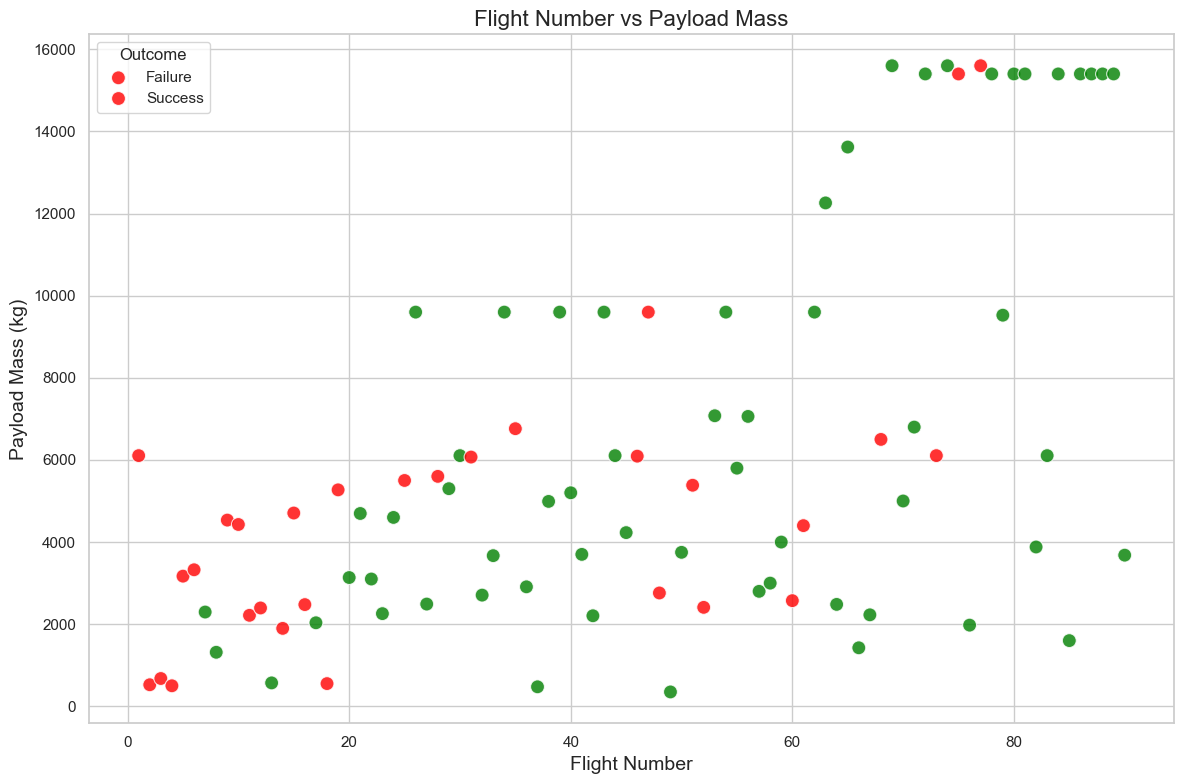

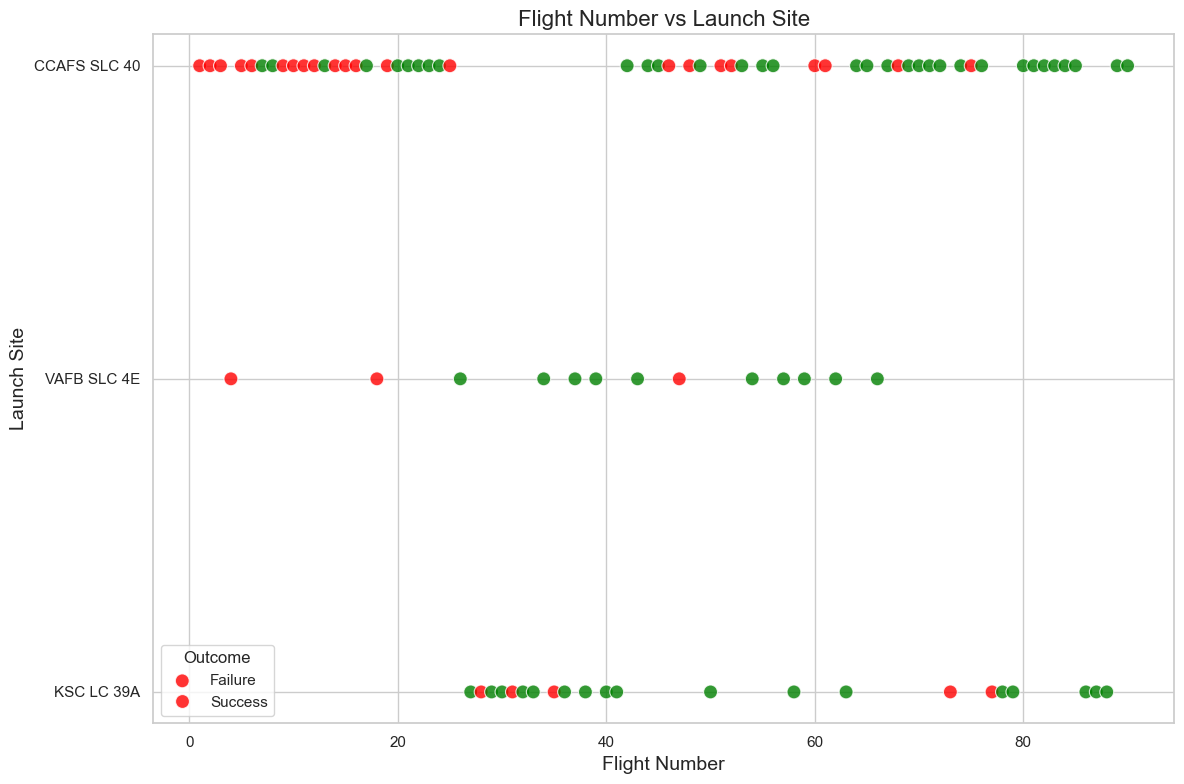

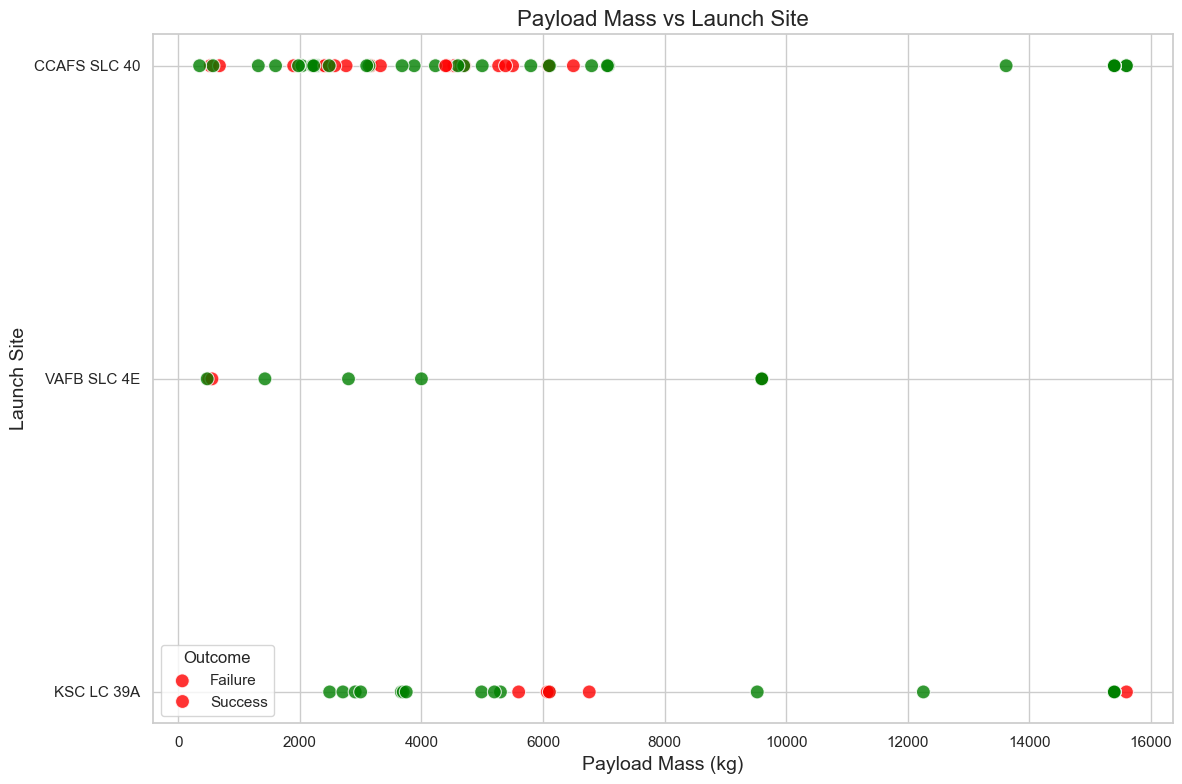

/var/folders/54/8p1pzd9s4nz5651vsnlrbfv40000gn/T/ipykernel_48896/520111711.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


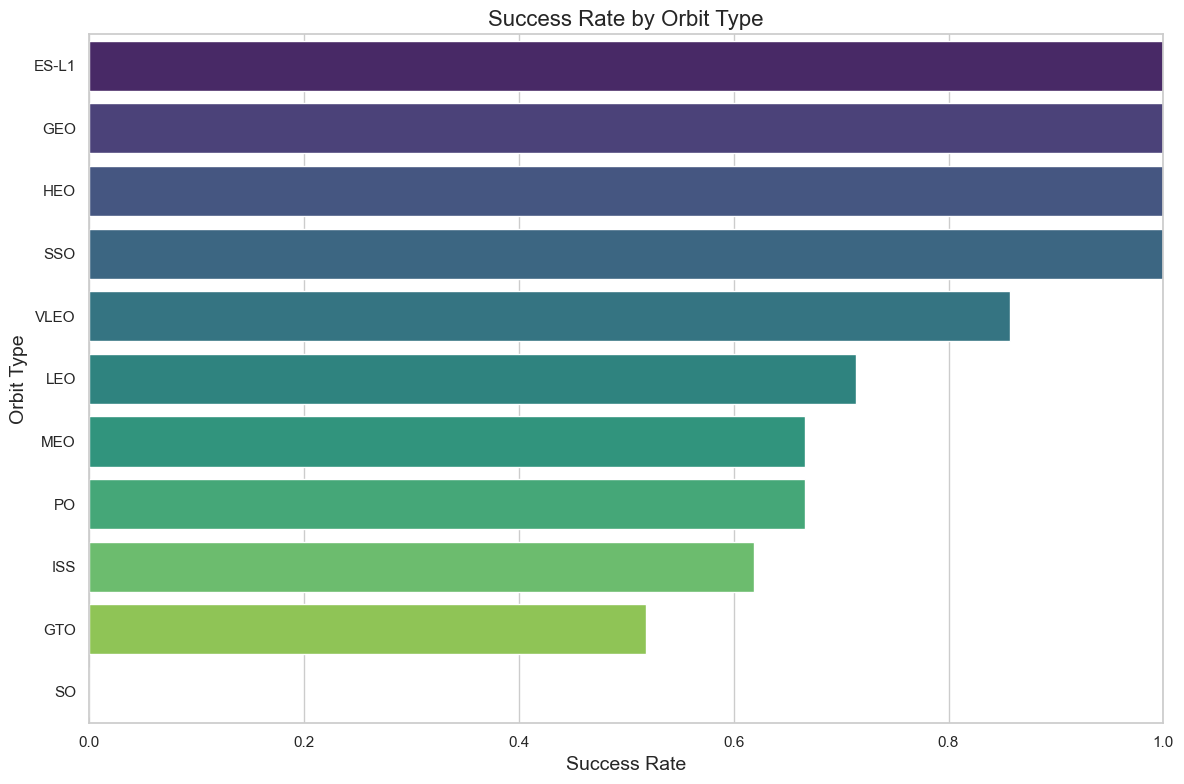

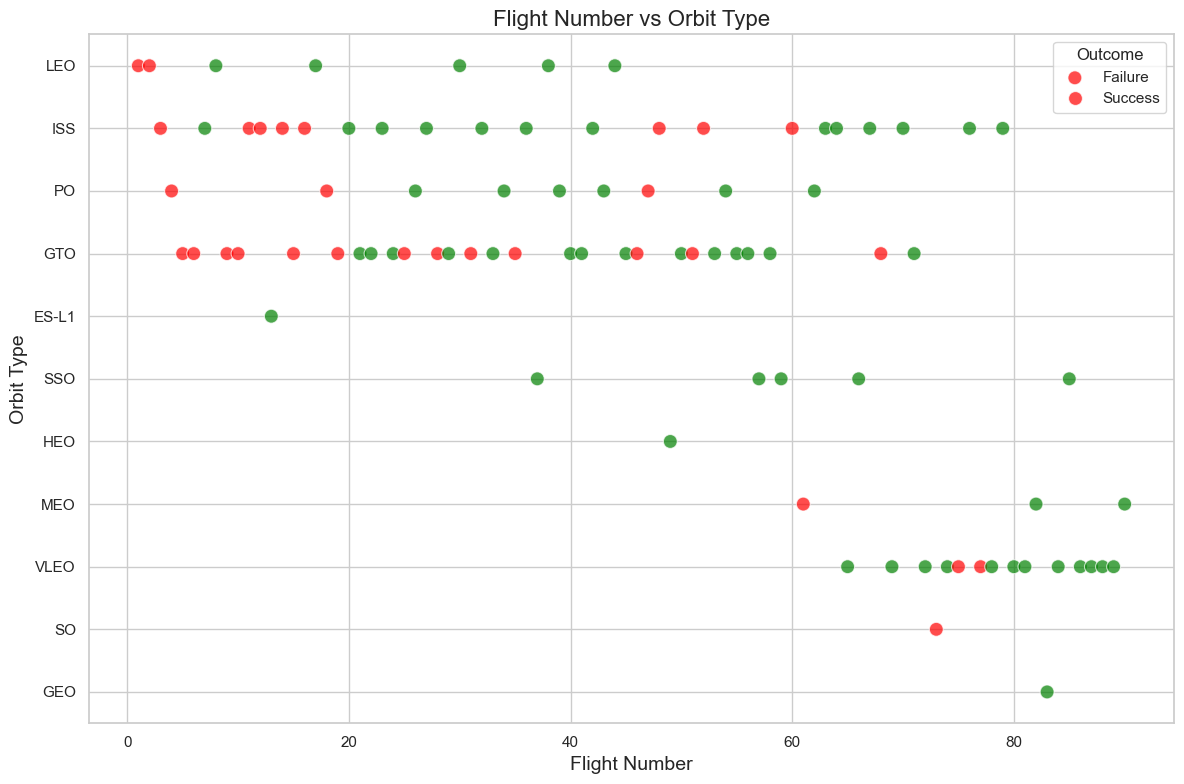

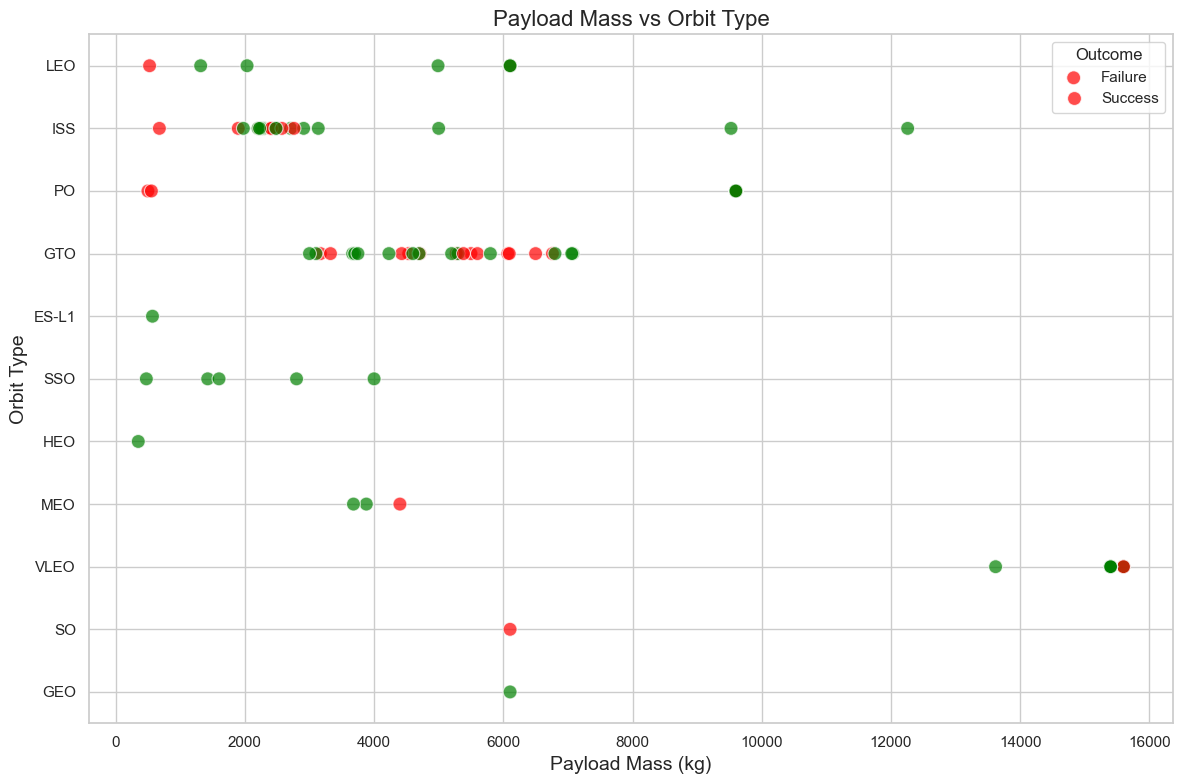

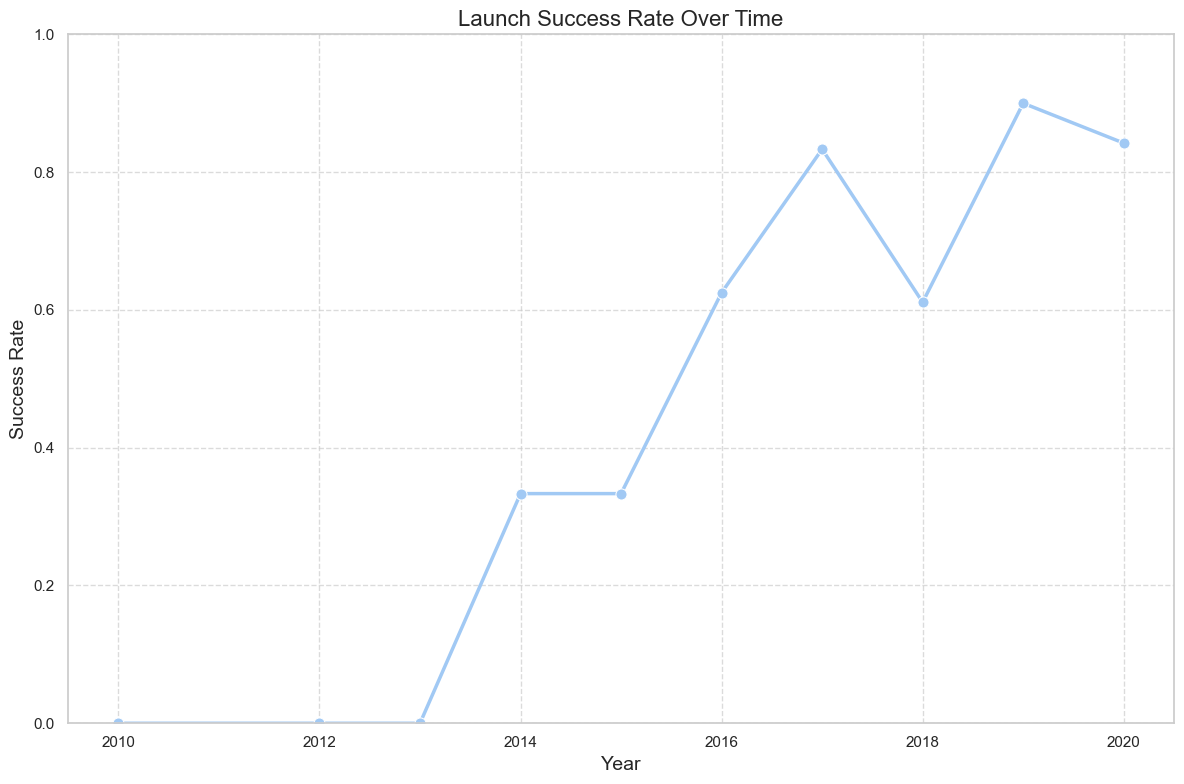

Feature engineering complete. Final dataset saved as 'dataset_part_3.csv'
Final dataset shape: (90, 80)


In [1]:
# Install required libraries
!pip install pandas numpy seaborn matplotlib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
print("Dataset loaded successfully. First 5 rows:")
print(df.head())

# Set seaborn style
sns.set_theme(style="whitegrid", palette="pastel")

# TASK: FlightNumber vs PayloadMass
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="FlightNumber", 
    y="PayloadMass", 
    hue="Class", 
    data=df, 
    palette={0: "red", 1: "green"},
    s=100,
    alpha=0.8
)
plt.title("Flight Number vs Payload Mass", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Payload Mass (kg)", fontsize=14)
plt.legend(title="Outcome", labels=["Failure", "Success"])
plt.tight_layout()
plt.savefig('flight_vs_payload.png', dpi=300)
plt.show()

# TASK 1: FlightNumber vs LaunchSite
plt.figure(figsize=(12, 8))
sns.scatterplot(
    y="LaunchSite", 
    x="FlightNumber", 
    hue="Class",
    data=df, 
    palette={0: "red", 1: "green"},
    s=100,
    alpha=0.8
)
plt.title("Flight Number vs Launch Site", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.legend(title="Outcome", labels=["Failure", "Success"])
plt.tight_layout()
plt.savefig('flight_vs_launchsite.png', dpi=300)
plt.show()

# TASK 2: Payload vs LaunchSite
plt.figure(figsize=(12, 8))
sns.scatterplot(
    y="LaunchSite", 
    x="PayloadMass", 
    hue="Class",
    data=df, 
    palette={0: "red", 1: "green"},
    s=100,
    alpha=0.8
)
plt.title("Payload Mass vs Launch Site", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.legend(title="Outcome", labels=["Failure", "Success"])
plt.tight_layout()
plt.savefig('payload_vs_launchsite.png', dpi=300)
plt.show()

# TASK 3: Success rate by Orbit
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(
    x=orbit_success.values, 
    y=orbit_success.index,
    palette="viridis"
)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.xlabel("Success Rate", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig('success_by_orbit.png', dpi=300)
plt.show()

# TASK 4: FlightNumber vs Orbit
plt.figure(figsize=(12, 8))
sns.scatterplot(
    y="Orbit", 
    x="FlightNumber", 
    hue="Class",
    data=df, 
    palette={0: "red", 1: "green"},
    s=100,
    alpha=0.7
)
plt.title("Flight Number vs Orbit Type", fontsize=16)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.legend(title="Outcome", labels=["Failure", "Success"])
plt.tight_layout()
plt.savefig('flight_vs_orbit.png', dpi=300)
plt.show()

# TASK 5: Payload vs Orbit
plt.figure(figsize=(12, 8))
sns.scatterplot(
    y="Orbit", 
    x="PayloadMass", 
    hue="Class",
    data=df, 
    palette={0: "red", 1: "green"},
    s=100,
    alpha=0.7
)
plt.title("Payload Mass vs Orbit Type", fontsize=16)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.legend(title="Outcome", labels=["Failure", "Success"])
plt.tight_layout()
plt.savefig('payload_vs_orbit.png', dpi=300)
plt.show()

# TASK 6: Success rate yearly trend
df['Year'] = pd.to_datetime(df['Date']).dt.year
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(
    x="Year", 
    y="Class", 
    data=yearly_success,
    marker='o',
    markersize=8,
    linewidth=2.5
)
plt.title("Launch Success Rate Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('success_over_time.png', dpi=300)
plt.show()

# Feature Engineering
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 
              'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# TASK 7: Create dummy variables
features_one_hot = pd.get_dummies(
    features, 
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],
    prefix=['Orbit', 'Site', 'Pad', 'Serial']
)

# TASK 8: Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Export results
features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("Feature engineering complete. Final dataset saved as 'dataset_part_3.csv'")
print(f"Final dataset shape: {features_one_hot.shape}")